In [4]:
include("common_functions.jl")
using LaTeXStrings
mshapes =  [:circle, :rect, :star5, :diamond, :hexagon, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x];

In [17]:
Nlist = [32, 64, 128, 256, 512]
pert_list = [ 0.01, 0.015, 0.02,0.025, 0.03,0.035, 0.04,0.05,0.06]
λlist = [ 0.94, 0.95, 0.96, 0.965, 0.97, 0.975, 0.98,0.985,  0.99]

N_super_list = []
pert_super_list = []
λ_super_list = []
state_super_list = []
for N in Nlist
    for pert in pert_list
        f = h5open("./data/saved_MPS/scaling_collapse_MPS/projected_Lzz_"*string(N)*"_"*string(pert)*".h5","r")
        state = read(f,"state",MPS)
        close(f)
        push!(state_super_list, state)      
        push!(pert_super_list, pert)
        push!(N_super_list, N)
    end
end

In [18]:
function annotatewithbox!(
    fig::Plots.Plot,
    text::Plots.PlotText,
    x::Real, y::Real, Δx::Real, Δy::Real = Δx;
    kwargs...)

box = Plots.Shape(:rect)

Plots.scale!(box, Δx, Δy)
Plots.translate!(box, x, y)

Plots.plot!(fig, box, c = :white, linestroke = :black, label = false; kwargs...)
Plots.annotate!(fig, x, y, text)

fig
end

annotatewithbox! (generic function with 2 methods)

In [19]:
strong_state_list = state_super_list
;

In [20]:
string_super_list = []
trivial1_super_list = []
trivial2_super_list = []
nm_super_list = []
for i in 1:length(N_super_list)
        n = N_super_list[i] ÷ 4
        n = isodd(n) ? n : n+1
        m = (3*N_super_list[i]) ÷ 4
        m = isodd(m) ? m : m+1
        ppstate = strong_state_list[i]
        tr2 = strong_nontrivial_2copy_correlator(ppstate, n, m, true)
        tr1 = strong_nontrivial_1copy_correlator(ppstate, n, m)

        push!(trivial1_super_list, tr1)
        push!(trivial2_super_list, tr2)
        push!(nm_super_list, [n, m])
end


In [21]:
pert_trim = []
λ_trim = []
N_trim = []
string1_trim = []
string2_trim = []
for i in 1:length(N_super_list)
    push!(N_trim, N_super_list[i])
    push!(pert_trim, pert_super_list[i])
    push!(string1_trim, trivial1_super_list[i] )
    push!(string2_trim, trivial2_super_list[i] )
end
stringarr1 = reshape(abs.(trivial1_super_list), ( length(pert_list), length(Nlist)))
stringarr2 = reshape(abs.(trivial2_super_list), ( length(pert_list), length(Nlist)))
;

In [22]:
default(xformatter=:latex, yformatter=:latex,  left_margin=1Plots.mm, legend= :right, framestyle = :box, size=1.6 .* (350,250), xminorticks=3,yminorticks=3, xticks=8, yticks =8, xtickfontsize=18,ytickfontsize=18,xguidefontsize=18,yguidefontsize=18,legendfontsize=10)


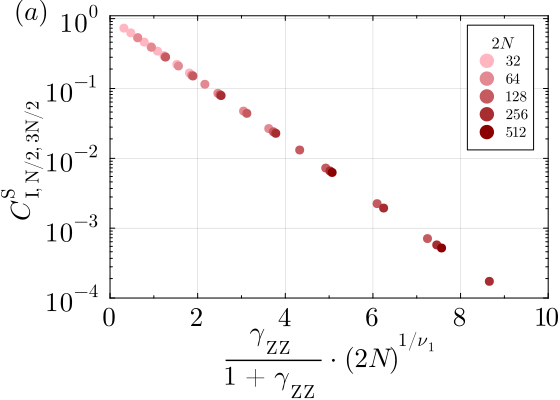

In [ ]:
ν = 1.0
ylbl = "\$ C_{\\textrm{I,N/2, 3N/2}}^{\\textrm{S}}\$"
xlbl = L"$ \frac{ \gamma_{\textrm{ZZ}}}{ 1 + \gamma_{\textrm{ZZ}} } \cdot (2N)^{1/\nu_1} \$"
ttl = "\$\\nu = $ν\$"
siz = 18

colorbar_ticks=(minimum(N_trim):10:maximum(N_trim), string.(round.(Int, (minimum(N_trim):10:maximum(N_trim)) .* 100), "%"))
p = plot( xlabel = xlbl,ylabel=ylbl, zcolor=N_trim, 
            # label="", yticks=[0,0.25, 0.5,0.75,1.0],xminorticks=1,yminorticks=1,
            ylim=(1e-4,1.1), xlim = (0,10),
            yticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0], yminorticks=10, 
            xticks=2 .* [0,1,2,3,4,5,6,7], xminorticks=2, 
            yaxis=:log, 
            legend=:topright, 
            right_margin=-3Plots.mm, bottom_margin=3Plots.mm,left_margin=1.1Plots.mm, top_margin=2Plots.mm,
            xtickfontsize=siz,ytickfontsize=siz,xguidefontsize=siz,yguidefontsize=siz, colorbar_title="\$N\$",grid = true,
            legend_title="\$2N\$")
for i in 1:length(Nlist)
    scatter!(p, Nlist[i]^(1/ν) .* pert_list ./ ( 1 .+ pert_list)   , stringarr1[:,i], 
    # scatter!(p, Nlist[i]^(1/ν) .* ( 1 .- λlist)   , stringarr1[:,i], 
    label="\$"*string(Nlist[i])*"\$", c=RGB(palette(:reds, length(Nlist))[i]),markerstrokewidth=0, markersize=5)
end
annotate!(-1.75, 1.2, text(L"(a)", 18), :black)

# savefig(p,"./images/for_paper/scaling_collapse_cs1_llam.pdf")
# savefig(p,"./images/for_paper/scaling_collapse_cs1_lzz.pdf")
display(p)

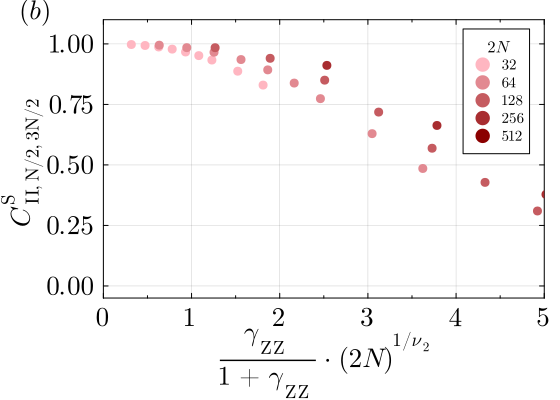

In [24]:
# ν = 0.9
ν = 1.
# ν = 1.192

ylbl = "\$ C_{\\textrm{II,N/2, 3N/2}}^{\\textrm{S}}\$"
xlbl = "\$ \\frac{\\lambda}{1-\\lambda} \\cdot (2N)^{1/\\nu} \$"
xlbl = "\$ \\gamma_{\\textrm{ZZ}} \\cdot (2N)^{1/\\nu} \$"
xlbl = L"$ \frac{ \gamma_{\textrm{ZZ}}}{ 1 + \gamma_{\textrm{ZZ}} } \cdot (2N)^{1/\nu_2} \$"
# xlbl = "\$ \\lambda \\cdot (2N)^{1/\\nu_2} \$"


ttl = "\$\\nu = $ν\$"
siz = 18
# colorbar_ticks = (linspace(minimum(N_trim),maximum(N_trim),5), string.(1:5) ) #string.(N_trim))
colorbar_ticks=(minimum(N_trim):10:maximum(N_trim), string.(round.(Int, (minimum(N_trim):10:maximum(N_trim)) .* 100), "%"))
p = plot( xlabel = xlbl,ylabel=ylbl, zcolor=N_trim, #title = ttl,
            label="", yticks=[0,0.25, 0.5,0.75,1.0],yminorticks=1,
            ylim=(-0.05,1.1), xlim = (0,5),
            # yticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0], yminorticks=10, 
            xticks= [0, 1, 2, 3, 4, 5], xminorticks=2, 
            # yaxis=:log, 
            right_margin=-2Plots.mm, bottom_margin=3Plots.mm,left_margin=1.1Plots.mm,top_margin=3Plots.mm, 
            xtickfontsize=siz,ytickfontsize=siz,xguidefontsize=siz,yguidefontsize=siz, colorbar_title="\$N\$",grid = true,
            legend_title="\$2N\$",
            legend=:topright)
            
for i in 1:length(Nlist)
    scatter!(p, Nlist[i]^(1/ν) .* (pert_list ) ./ ( 1 .+ pert_list), stringarr2[:,i], 
    # scatter!(p, Nlist[i]^(1/ν) .* (1 .- λlist ), stringarr2[:,i], 
    label="\$"*string(Nlist[i])*"\$", c=RGB(palette(:reds, length(Nlist))[i]),markerstrokewidth=0, markersize=5)
end
annotate!(-0.75, 1.13, text(L"(b)", 18), :black)

# savefig(p,"./images/for_paper/scaling_collapse_cs2_lzz.pdf")
# savefig(p,"./images/for_paper/scaling_collapse_cs2_llam.pdf")
display(p)